# KNN
## Import Liberary :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')


from sklearn.preprocessing import OneHotEncoder
one = OneHotEncoder(sparse=False)

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

### Load Dataset

In [2]:
df = pd.read_csv('data.csv',index_col=[0])

### View Data

In [3]:
df.head()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0


In [4]:
df.tail()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
858,48,3,2,24.0,0,0,14,31,19,12,3,1,0,1
859,0,0,2,35.0,0,0,14,31,19,12,3,1,0,0
860,3,1,1,49.4,0,0,14,31,19,12,3,1,0,0
861,24,9,1,49.4,0,0,14,31,19,12,3,1,0,0
862,15,27,1,70.0,0,0,14,31,19,12,3,1,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 863 entries, 0 to 862
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   location      863 non-null    int64  
 1   country       863 non-null    int64  
 2   gender        863 non-null    int64  
 3   age           863 non-null    float64
 4   vis_wuhan     863 non-null    int64  
 5   from_wuhan    863 non-null    int64  
 6   symptom1      863 non-null    int64  
 7   symptom2      863 non-null    int64  
 8   symptom3      863 non-null    int64  
 9   symptom4      863 non-null    int64  
 10  symptom5      863 non-null    int64  
 11  symptom6      863 non-null    int64  
 12  diff_sym_hos  863 non-null    int64  
 13  result        863 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 101.1 KB


In [6]:
df.shape

(863, 14)

In [7]:
loc=pd.DataFrame(one.fit_transform(df[['location']]))

In [8]:
con=pd.DataFrame(one.fit_transform(df[['country']]))

In [9]:
gen=pd.DataFrame(one.fit_transform(df[['gender']]))

In [10]:
s1=pd.DataFrame(one.fit_transform(df[['symptom1']]))

In [11]:
s2=pd.DataFrame(one.fit_transform(df[['symptom2']]))

In [12]:
s3=pd.DataFrame(one.fit_transform(df[['symptom3']]))

In [13]:
s4=pd.DataFrame(one.fit_transform(df[['symptom4']]))

In [14]:
s5=pd.DataFrame(one.fit_transform(df[['symptom5']]))

In [15]:
new_df = pd.concat ([loc,con,gen,s1,s2,s3,s4,s5], axis=1)

In [16]:
new_df

,0,1,2,3,4,5,6,7,8,9,...,7,8,9,10,11,12,0,1,2,3
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
859,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
860,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [17]:
new_df= pd.concat((new_df,df['age'],df['vis_wuhan'],df['from_wuhan'],df['symptom6'],df['diff_sym_hos'],df['result']),axis=1)
new_df

,0,1,2,3,4,5,6,7,8,9,...,0,1,2,3,age,vis_wuhan,from_wuhan,symptom6,diff_sym_hos,result
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,66.0,1,0,1,8,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,56.0,0,1,1,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,46.0,0,1,1,13,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,60.0,1,0,1,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,58.0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,24.0,0,0,1,0,1
859,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,35.0,0,0,1,0,0
860,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,49.4,0,0,1,0,0
861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,49.4,0,0,1,0,0


In [18]:
new_df= new_df.drop(columns=['symptom6'], axis=1)
new_df

,0,1,2,3,4,5,6,7,8,9,...,12,0,1,2,3,age,vis_wuhan,from_wuhan,diff_sym_hos,result
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,66.0,1,0,8,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,56.0,0,1,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,46.0,0,1,13,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,60.0,1,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,58.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,24.0,0,0,0,1
859,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,35.0,0,0,0,0
860,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,49.4,0,0,0,0
861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,49.4,0,0,0,0


In [19]:
new_df.isnull().sum()

0               0
1               0
2               0
3               0
4               0
               ..
age             0
vis_wuhan       0
from_wuhan      0
diff_sym_hos    0
result          0
Length: 275, dtype: int64

<AxesSubplot:xlabel='result', ylabel='count'>

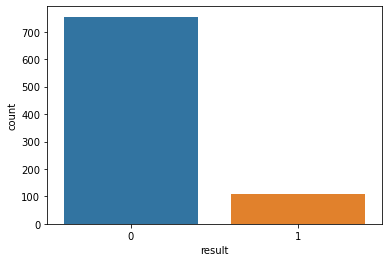

In [20]:
sns.countplot(new_df['result'])

### the number of people that will recover from corona virus is much greater than the people that wont recover

<AxesSubplot:xlabel='age'>

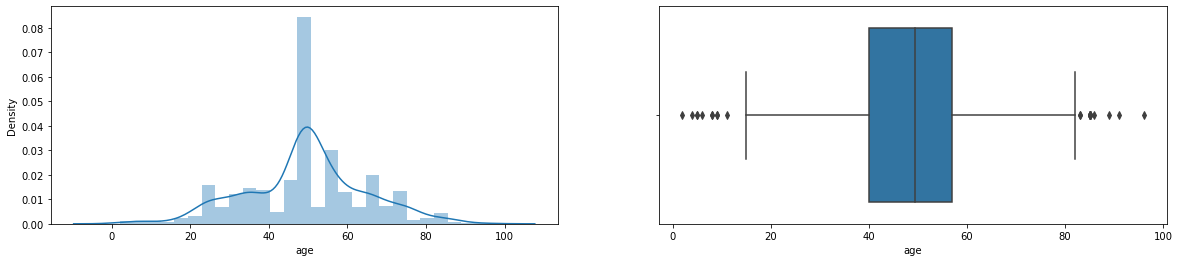

In [21]:
f = plt.figure(figsize=(20,4))

f.add_subplot(1,2,1)
sns.distplot(new_df['age'])

f.add_subplot(1,2,2)
sns.boxplot(new_df['age'])

#### the largest number of infection with corona virus is people betwwen the age fo 40 to 60 according to the dataset

In [22]:
df.corr().style.background_gradient().set_precision(2) #on old data

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
location,1.00,0.31,0.03,-0.03,0.02,0.08,0.03,0.02,0.01,-0.03,0.03,0.02,-0.12,0.05
country,0.31,1.00,0.19,0.07,-0.15,-0.19,-0.08,-0.09,-0.04,-0.02,-0.01,-0.00,-0.15,-0.09
gender,0.03,0.19,1.00,-0.02,-0.01,-0.14,0.15,0.12,0.09,0.02,0.03,0.04,-0.18,-0.06
age,-0.03,0.07,-0.02,1.00,-0.16,-0.05,-0.21,-0.13,-0.07,-0.07,0.05,0.06,0.07,0.52
vis_wuhan,0.02,-0.15,-0.01,-0.16,1.00,-0.15,0.09,0.09,0.09,0.06,0.03,0.02,0.07,-0.15
from_wuhan,0.08,-0.19,-0.14,-0.05,-0.15,1.00,0.04,0.05,0.07,0.02,0.02,0.01,0.02,0.13
symptom1,0.03,-0.08,0.15,-0.21,0.09,0.04,1.00,0.52,0.26,0.10,-0.00,0.09,-0.14,-0.16
symptom2,0.02,-0.09,0.12,-0.13,0.09,0.05,0.52,1.00,0.53,0.33,0.16,0.07,-0.12,-0.10
symptom3,0.01,-0.04,0.09,-0.07,0.09,0.07,0.26,0.53,1.00,0.43,0.12,0.15,-0.12,-0.07
symptom4,-0.03,-0.02,0.02,-0.07,0.06,0.02,0.10,0.33,0.43,1.00,0.28,0.11,-0.09,-0.11


#### the result is directly proportional to the age

<AxesSubplot:xlabel='diff_sym_hos', ylabel='age'>

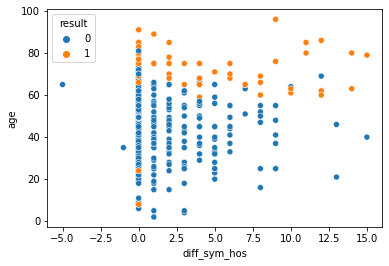

In [23]:
sns.scatterplot(data=df, x="diff_sym_hos", y="age", hue="result")

### Modeling

In [24]:
x = new_df.drop(columns=['result'])
y = new_df['result']
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=4)

In [25]:
k_range = range(1, 31)


k_scores = []
k_recall = []
k_f1 = []
k_precision = []
k_auc=[]

for k in k_range:

    knn = KNeighborsClassifier(n_neighbors=k)

    scores = cross_val_score(knn, x_train,y_train, cv=5, scoring='accuracy')

    k_scores.append(scores.mean())
    y_train_predict = cross_val_predict(knn, x_train, y_train , cv = 5)
    k_precision.append(precision_score(y_train ,y_train_predict))
    k_recall.append(recall_score(y_train ,y_train_predict))
    k_f1.append(f1_score(y_train ,y_train_predict))
    k_auc.append(roc_auc_score(y_train,y_train_predict))
print(k_scores)
print(k_recall)
print(k_f1)
print(k_precision)
print(k_auc)

[0.9434782608695652, 0.9289855072463767, 0.9434782608695652, 0.9318840579710145, 0.9318840579710145, 0.9347826086956521, 0.927536231884058, 0.9217391304347826, 0.9260869565217391, 0.9202898550724639, 0.9217391304347826, 0.9159420289855074, 0.9231884057971016, 0.9173913043478261, 0.9217391304347826, 0.9173913043478261, 0.9217391304347826, 0.9202898550724639, 0.9217391304347826, 0.9173913043478261, 0.9202898550724636, 0.9202898550724636, 0.9188405797101449, 0.9202898550724636, 0.9188405797101449, 0.9217391304347826, 0.9202898550724636, 0.9217391304347826, 0.9217391304347826, 0.9217391304347826]
[0.7954545454545454, 0.5340909090909091, 0.7386363636363636, 0.5795454545454546, 0.6363636363636364, 0.6022727272727273, 0.625, 0.5681818181818182, 0.625, 0.5681818181818182, 0.625, 0.5568181818181818, 0.6136363636363636, 0.5681818181818182, 0.6022727272727273, 0.5568181818181818, 0.6136363636363636, 0.5795454545454546, 0.6022727272727273, 0.5454545454545454, 0.5795454545454546, 0.5568181818181818

Text(0, 0.5, 'Cross-Validated Accuracy')

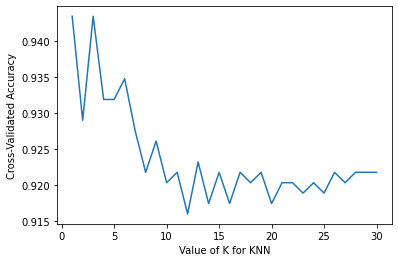

In [26]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [27]:
knn = KNeighborsClassifier(n_neighbors=3) # can be k =1 also 

In [28]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

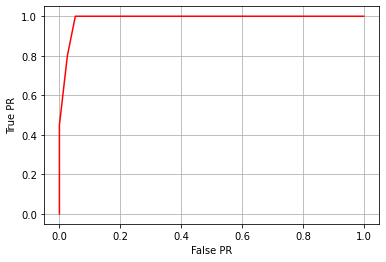

In [29]:
y_pred_test = knn.predict(x_test)
y_test_score=knn.predict_proba(x_test)
fpr, tpr, thresholds_knn = roc_curve(y_test,y_test_score[:,1])
plt.plot(fpr,tpr, "r")
plt.xlabel("False PR")
plt.ylabel("True PR")
plt.grid()
plt.show()

In [30]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_test))
print("Precision:",metrics.precision_score(y_test, y_pred_test))
print("Recall:",metrics.recall_score(y_test, y_pred_test))
print("f1:",f1_score(y_test, y_pred_test))

Accuracy: 0.953757225433526
Precision: 0.8
Recall: 0.8
f1: 0.8000000000000002


In [31]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       153
           1       0.80      0.80      0.80        20

    accuracy                           0.95       173
   macro avg       0.89      0.89      0.89       173
weighted avg       0.95      0.95      0.95       173



In [32]:
roc_auc_score(y_test,y_test_score[:,1])

0.9875816993464052